# Avaliação Python

Este *notebook* tem o objetivo de avaliar seu conhecimento em Python, bem como em três ferramentas populares: numpy, pandas e scikit-learn.

Não se preocupe se você não terminar o *notebook* inteiro, ele serve simplesmente para avaliarmos qual conteúdo incluir nos próximos tutoriais de Python.

Cada exercício é projetado para avaliar alguns de seus conhecimentos básicos em python ou aspectos específicos de como usar uma das bibliotecas.
Tente fazer pelo menos os 3 primeiros exercícios. Do exercício 4 em diante, se você o achar particularmente difícil, fique à vontade para pular o exercício e passar para o próximo.

## Exercício 0: importar módulos <a id='ex1'></a> 

Por favor, importe os seguintes módulos
* o submódulo `pyplot` do `matplotlib` com o alias `plt`
* `pandas` com o alias `pd`
* `seaborn` com o alias `sns`
* `numpy` com o alias `np`
* todas as funções do módulo `utils`


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from utils import *

# Exercício 1: criar matrizes aleatórias em numpy

Crie as seguintes matrizes em numpy:
* Uma matriz identidade de dimensões `(10,10)` na variável `I`
* Uma matriz aleatória do tipo `int` com valores no intervalo `[0,100]` e dimensões `(5,5)` na variável `A`
* Uma matriz aleatória do tipo `float` com valores no intervalo `[0,1]` e dimensões `(5,5)` na variável `B`
* Use `B` para calcular $ C = BB ^ T $ e armazene o resultado na variável `C`
* Inverta `C` e armazene a matriz invertida em `C_inv`
* Transponha `A` e armazene a matriz transposta em `A_T`

In [5]:
np.random.seed(0)

I = np.identity(10)
A = np.random.randint(0, 100, (5, 5))
B = np.random.random_sample((5, 5))
C = np.dot(B, B.T)
C_inv = np.linalg.inv(C)
A_T = np.transpose(A)

ex_1_vars = [I, A, A_T, B, C, C_inv, C @ C_inv]

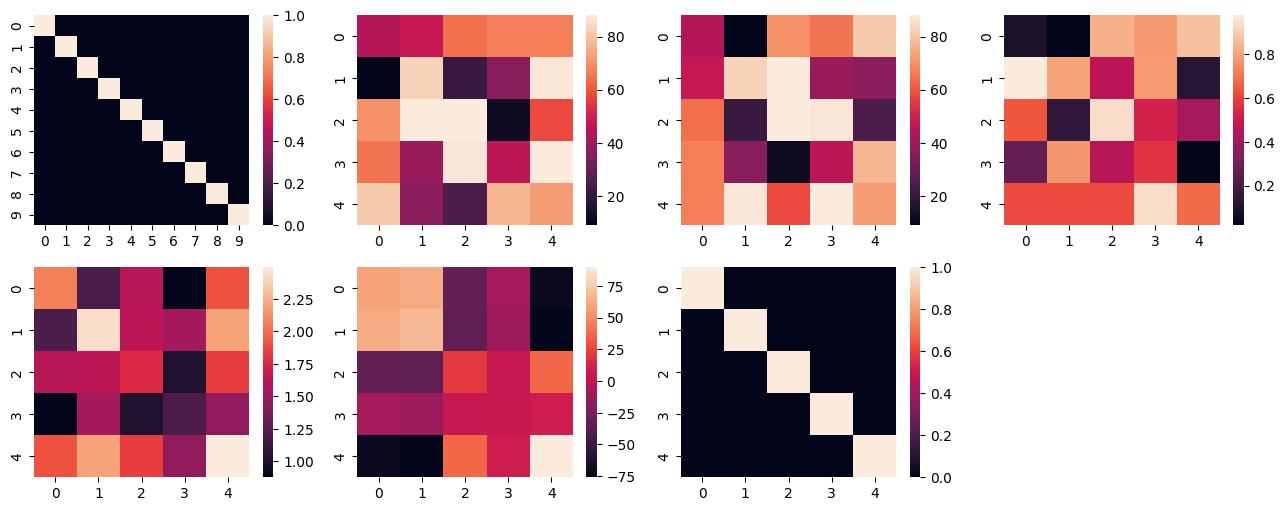

In [6]:
plot_ex1(ex_1_vars)

### Saída esperada:

![expected image ex 1](ex1.png "Expected output ex 1")
```
```

## Exercício 2: operadores numpy e list

Começando com as matrizes fornecidas `A` e` B`, execute as seguintes operações e adicione os resultados na variável `ex_2_vars`:

* produto escalar entre `A` e` B`
* multiplicação elemento a elemento entre `A` e` B`
* vetor da soma das linhas de `A`
* vetor da média das colunas de `B`


In [33]:
np.random.seed(0)
A = np.random.rand(10, 10)
B = np.random.rand(10, 10)

ex_2_vars = []

scalar_product = np.dot(A, B)  # Produto escalar
ex_2_vars.append(scalar_product)

product_element_by_element = A * B
ex_2_vars.append(product_element_by_element)

sum_of_all_rows = A.sum(axis=0)
ex_2_vars.append(sum_of_all_rows)

mean_of_all_columns = B.mean(axis=1)
ex_2_vars.append(mean_of_all_columns)

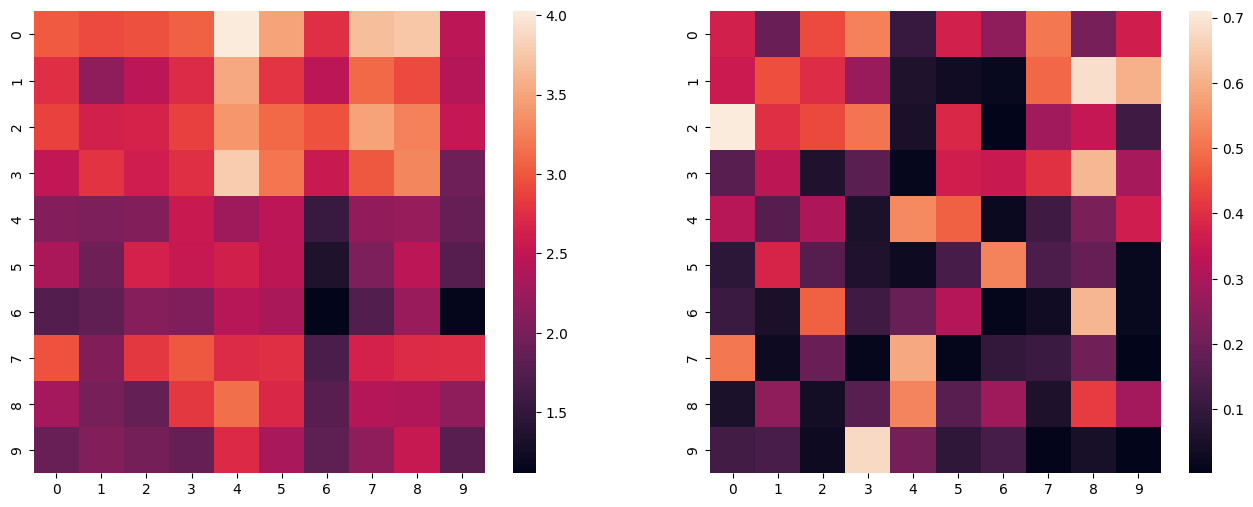

[array([5.28539835, 5.35380972, 5.6034787 , 5.13354102, 3.29925204,
       3.67902113, 4.29030669, 3.99955955, 6.52812667, 4.10689007]), array([0.5810242 , 0.65373969, 0.51279199, 0.4952426 , 0.68347771,
       0.46202251, 0.58440466, 0.38212016, 0.53170837, 0.39428567])]


In [34]:
plot_ex2(ex_2_vars)

### Saída esperada:

![expected image ex 2](ex2.png "Expected output ex 2")

```
[array([5.28539835, 5.35380972, 5.6034787 , 5.13354102, 3.29925204,
       3.67902113, 4.29030669, 3.99955955, 6.52812667, 4.10689007]), array([0.5810242 , 0.65373969, 0.51279199, 0.4952426 , 0.68347771,
       0.46202251, 0.58440466, 0.38212016, 0.53170837, 0.39428567])]
```

## Exercício 3: amostragem

* Amostra 1000 pontos aleatoriamente de uma distribuição **uniforme** em 2 dimensões no intervalo $[30, 50]$ para $x$, e $[25,45]$ para $y$. Armazene os valores na variável `uniform_sample` com dimensões `(1000, 2)`
* Amostra 1000 pontos aleatoriamente de uma distribuição **normal** em 2 dimensões com média em $(15,10)$ e desvio padrão de `1,5`. Armazene os valores na variável `normal_sample` com dimensões `(1000, 2) `
* Amostra 5000 pontos aleatoriamente de uma distribuição **normal** em **3** dimensões com média na origem e desvio padrão de `1`. Mantenha apenas os pontos onde todos os componentes são positivos. Normalize os pontos para que sua norma seja 1. Armazene os valores em uma variável `normal_sample_3d`.

In [83]:
np.random.seed(0)

x_samples = (50 - 30) * np.random.random_sample((1000,)) + 30
y_samples = (45 - 25) * np.random.random_sample((1000,)) + 25
uniform_sample = np.array([ [x_samples[i], y_samples[i]] for i in range(1000) ])  # Amostra uniforme

normal_sample = np.random.normal((15, 10), 1.5, (1000, 2))

normal_sample_3d = np.array(list(filter(
    lambda sample: sample.min() > 0,
    np.random.normal((0,0,0), 1, (5000, 3))
)))
normal_sample_3d = np.array(list(map(
    lambda sample: sample / np.sqrt(np.dot(sample.T, sample)),
    normal_sample_3d
)))

normal_sample_3d

array([[0.11740565, 0.82520917, 0.55249049],
       [0.82246311, 0.44610996, 0.35290273],
       [0.17243032, 0.54858717, 0.81811973],
       ...,
       [0.76052707, 0.02677832, 0.64875381],
       [0.99513521, 0.04882764, 0.08556738],
       [0.63989877, 0.32215545, 0.69767144]], shape=(625, 3))

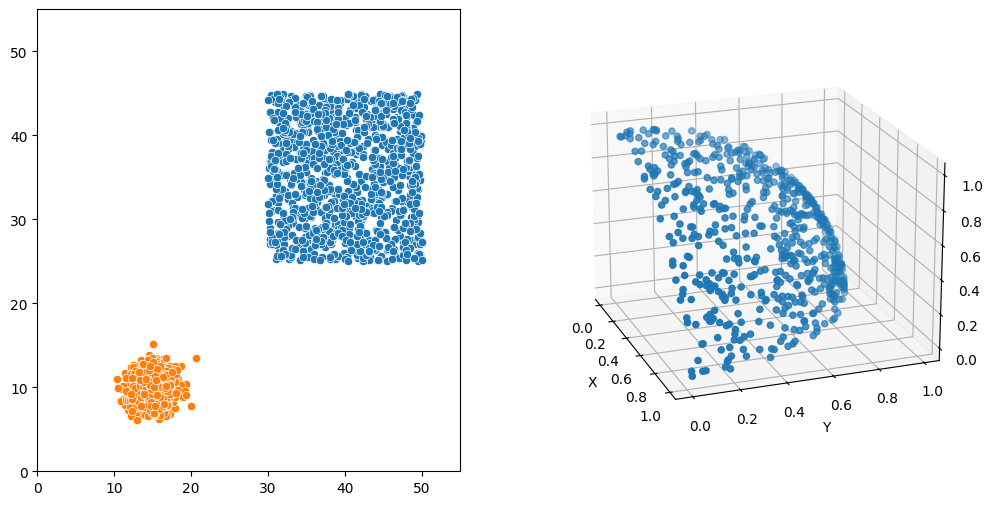

In [84]:
plot_ex3(uniform_sample, normal_sample, normal_sample_3d)

### Saída esperada:

![expected image ex 3](ex3.png "Expected output ex 2")

## Exercício 4: gestão de dados com pandas

Carregue o arquivo `data/clinic_trials-raw.tsv` em um DataFrame do pandas em uma variável chamada `trials`, e execute as seguintes operações nos dados:

* Mantenha apenas os estudos em que a coluna `Phases` tenha um destes valores: `Phase 2`, `Phase 3`,` Phase 4`
* Adicione uma coluna `date` que converte a coluna `Start Date` para valores do tipo `datetime`
* A coluna `Interventions` é uma lista separada pelo caractere `|`. Adicione uma coluna `interventions_list` ao DataFrame que tenha as mesmas informações, mas com o tipo `list`
* extraia todas as intervenções em uma variável `interventions_unique`, a variável não deve conter entradas duplicadas.
* Use `interventions_unique` para fazer uma lista de todas as intervenções envolvendo uma droga. Armazene a lista de drogas em uma variável `drugs`. Você só deve armazenar o nome do medicamento.
* Adicione uma coluna `age_clean` do tipo `list` ao conjunto de dados e preencha-a usando os valores da coluna `Age`. Você deve incluir apenas os valores `Child`, `Adult`, e `Older Adult`.

In [ ]:
# seu código aqui (~15 linhas)


In [ ]:
plot_ex4(interventions_unique, drugs, trials)

### Saída esperada:

![expected image ex 4](ex4.png "Expected output ex 4")

```
Number of Interventions: 1306
Number of Drugs: 912
```

## Exercício 5: análise avançada de dados

Carregue o arquivo `data/drugbank.pkl` em um DataFrame do pandas em uma variável chamada `drugbank`, e execute as seguintes operações nos dados (**nota:** *o arquivo está em formato longo*):

* Crie um novo DataFrame `approved` que contenha apenas medicamentos que tenham o valor` Group` como `approved`
* Use o DataFrame `approved` para criar um novo DataFrame` drugbank_wide` que possua as seguintes colunas:
     * `DrugBank ID`
     * `Name`
     * `Target Count` (você precisará calcular este valor)
     * `Top ATC` (o Top ATC é o **primeiro caractere** da coluna `ATC`. Se nenhum ATC estiver disponível, use o valor `'NOT FOUND'`
    
<details>
    <summary>DICAS</summary>
    <ul>
        <li>Use a função <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html"><code>set_index</code></a> e defina a coluna <code>DrugBank ID</code> como o índice do DataFrame.</li>
        <li>As funçoes a seguir serão muito úteis nesta situaçao:
            <ul>
                <li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html"><code>join</code></a></li>
                <li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html"><code>drop</code></a></li>
                <li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html"><code>rename</code></a></li>
            </ul>
        </li>
    </ul>
</details>


In [ ]:
# seu código aqui (~12 linhas)


In [ ]:
plot_ex5(drugbank_wide, drugbank)

### Expected output:

![expected image ex 5](ex5.png "Expected output ex 5")

## Exercise 6: Matrizes enormes

For this exercise, you need to make some calculations using very big matrices.

* Uma matriz aleatória $A$ com dimensões `(100000000,100000000)` e 10000 valores aleatórios entre 0 e 1 (uma matriz de densidade muito pequena)
* calcule a soma de todos os valores da $A$
* calcule $AA^T$
* calcule a soma de todos os valores da $AA^T$

<div style="color:red">
    <h3>ADVERTÊNCIA</h3>
    <p>Tenha cuidado com este exercício, tentar criar matrizes enormes pode encher toda a memória do seu computador.</p>
</div>

<details>
    <summary>DICAS</summary>
        <p>Use a função <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random.html"><code>scipy.sparse.random</code></a> e defina o valor do argumento <code>density</code> a o valor correto</p>
</details>

In [ ]:
# seu código aqui (~5 linhas)
print(sum_A, sum_AAT)

### Saída esperada:

```
5006.723203156358 0.0
```

## Exercício 7: agrupamento com scikit-learn

Para este exercício, você precisará importar os módulos necessários do scikit-learn

* Carregue o conjunto de dados da íris
* divida o conjunto de dados em treinamento e teste usando `train_test_split` (defina `random_state = 0`)
* Treine um classificador de árvore de decisão (defina `random_state = 0`)
* Plote uma matriz de confusão dos resultados
* Em outra célula, plote a árvore de decisão

In [ ]:
# seu código aqui (~10 linhas)


### Saída esperada:
```
<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at ...>
```

![expected image ex 6-1](ex6-1.png "Expected output ex 6")

In [ ]:
plt.figure(figsize = (4,8))
# seu código aqui (1 linha)


### Saída esperada:
```
[Text(89.28, 391.392, 'X[3] <= 0.75\ngini = 0.663\nsamples = 90\nvalue = [34, 27, 29]'),
 Text(44.64, 304.416, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(133.92000000000002, 304.416, 'X[2] <= 5.05\ngini = 0.499\nsamples = 56\nvalue = [0, 27, 29]'),
 Text(89.28, 217.44, 'X[3] <= 1.75\ngini = 0.128\nsamples = 29\nvalue = [0, 27, 2]'),
 Text(44.64, 130.464, 'gini = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(133.92000000000002, 130.464, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(89.28, 43.488, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(178.56, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(178.56, 217.44, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]
```

![expected image ex 6-2](ex6-2.png "Expected output ex 6-2")